## Partie I : Analyse de Sentiment avec RNN

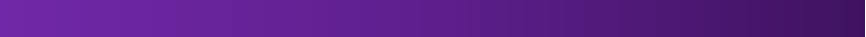

* **Étape 1: Préparation de l'environnement de travail**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

* **Étape 2: Chargement et Exploration du Jeu de Données**

In [2]:
data = pd.read_csv('IMDB Dataset.csv') 

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
positive_count = data[data['sentiment'] == 'positive'].shape[0]
negative_count = data[data['sentiment'] == 'negative'].shape[0]

print(f"Nombre de critiques positives : {positive_count}")
print(f"Nombre de critiques négatives : {negative_count}")

Nombre de critiques positives : 25000
Nombre de critiques négatives : 25000


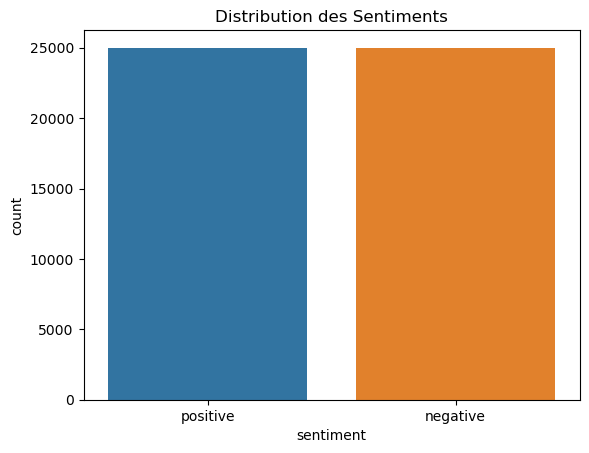

In [6]:
sns.countplot(x='sentiment', data=data)
plt.title('Distribution des Sentiments')
plt.show()

In [7]:
data['longueur'] = data['review'].apply(lambda x: len(x.split()))

moyenne_longueur = data['longueur'].mean()
print(f"Longueur moyenne des critiques : {moyenne_longueur}")

Longueur moyenne des critiques : 231.15694


In [8]:
data.head()

,review,sentiment,longueur
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


pip install wordcloud

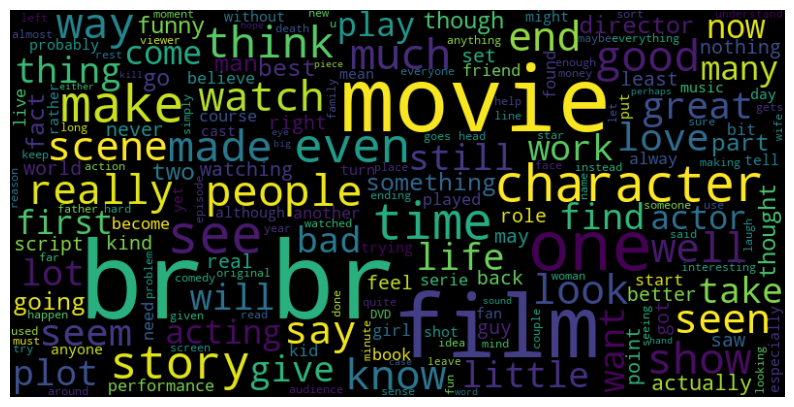

In [9]:
from wordcloud import WordCloud
texte_complet = ' '.join(data['review'])
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(texte_complet)


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [10]:
print("Exemples de critiques positives:")
print(data[data['sentiment'] == 'positive']['review'].head())

print("\nExemples de critiques négatives:")
print(data[data['sentiment'] == 'negative']['review'].head())

Exemples de critiques positives:
0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
4    Petter Mattei's "Love in the Time of Money" is...
5    Probably my all-time favorite movie, a story o...
Name: review, dtype: object

Exemples de critiques négatives:
3     Basically there's a family where a little boy ...
7     This show was an amazing, fresh & innovative i...
8     Encouraged by the positive comments about this...
10    Phil the Alien is one of those quirky films wh...
11    I saw this movie when I was about 12 when it c...
Name: review, dtype: object


* **Étape 3: Pre-processing**

In [11]:
data['sentiment_code'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [12]:
data.head()

,review,sentiment,longueur,sentiment_code
0,One of the other reviewers has mentioned that ...,positive,307,1
1,A wonderful little production. <br /><br />The...,positive,162,1
2,I thought this was a wonderful way to spend ti...,positive,166,1
3,Basically there's a family where a little boy ...,negative,138,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1


In [13]:
import re
from string import punctuation

def nettoyer_texte(texte):
    texte = texte.lower()
    texte = ''.join([caractere for caractere in texte if caractere not in punctuation])
    # Supprimer les balises HTML
    texte = re.sub('<.*?>', '', texte)
    return texte

In [14]:
data['review'] = data['review'].apply(nettoyer_texte)

In [15]:
data.review

0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object

In [16]:
# Tokeniser les textes
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
#longueur de séquence nominale de 200
max_length = 200
# Tronquer et compléter les séquences numériques
X = pad_sequences(sequences, maxlen=max_length, padding='post')

In [18]:
exemple_texte = data['review'][0]
exemple_sequence = X[0]
print(f"Exemple de texte original :\n{exemple_texte}\n")
print(f"Exemple de séquence numérique correspondante :\n{exemple_sequence}")

Exemple de texte original :
one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where 

> **Alors Maintenant on va diviser notre jeux de données en Test et Train**

In [19]:
y = data['sentiment_code']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Taille de l\'ensemble d\'entraînement : {len(x_train)}')
print(f'Taille de l\'ensemble de test : {len(x_test)}')

Taille de l'ensemble d'entraînement : 40000
Taille de l'ensemble de test : 10000


* **Étape 4: Construction du Modèle RNN basique**

In [20]:
# Créer le modèle RNN basique
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model.add(SimpleRNN(units=32))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Étape 5: Compilation et Entraînement du Modèle**

Epoch 1/10
313/313 [==============================] - 20s 54ms/step - loss: 0.6381 - accuracy: 0.6179 - val_loss: 0.6406 - val_accuracy: 0.6016
Epoch 2/10
313/313 [==============================] - 17s 55ms/step - loss: 0.5554 - accuracy: 0.7350 - val_loss: 0.6490 - val_accuracy: 0.6277
Epoch 3/10
313/313 [==============================] - 16s 53ms/step - loss: 0.5639 - accuracy: 0.7152 - val_loss: 0.5720 - val_accuracy: 0.7469
Epoch 4/10
313/313 [==============================] - 16s 51ms/step - loss: 0.5676 - accuracy: 0.7217 - val_loss: 0.6607 - val_accuracy: 0.5890
Epoch 5/10
313/313 [==============================] - 17s 53ms/step - loss: 0.5801 - accuracy: 0.6798 - val_loss: 0.6792 - val_accuracy: 0.6022
Epoch 6/10
313/313 [==============================] - 17s 54ms/step - loss: 0.5039 - accuracy: 0.7295 - val_loss: 0.6130 - val_accuracy: 0.6942
Epoch 7/10
313/313 [==============================] - 17s 55ms/step - loss: 0.4903 - accuracy: 0.7588 - val_loss: 0.7216 - val_accuracy:

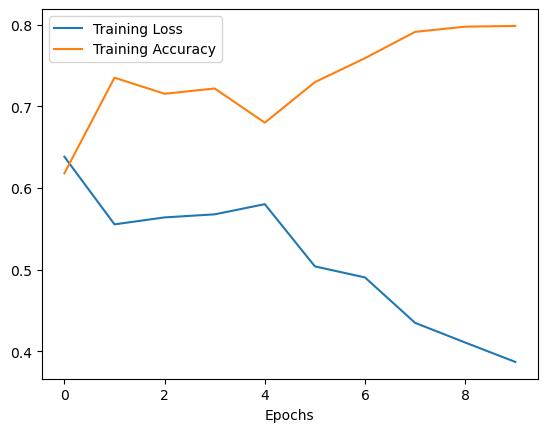

In [22]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 128
epochs = 10

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

* **Étape 6:  Évaluation du Modèle**

313/313 [==============================] - 4s 10ms/step
Précision du modèle : 58.83%


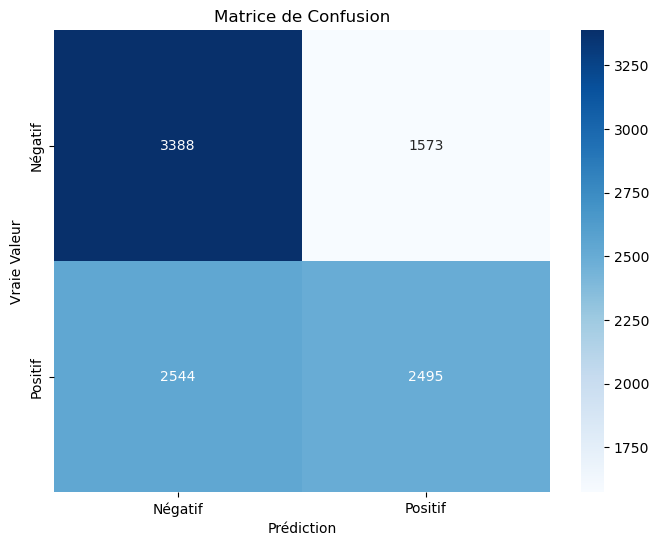

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.57      0.68      0.62      4961
           1       0.61      0.50      0.55      5039

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.58     10000
weighted avg       0.59      0.59      0.58     10000



In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int) 

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion')
plt.show()

# Afficher le rapport de classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred))

> Précision (precision) :

* La précision mesure la proportion de vrais positifs parmi tous les exemples prédits comme positifs.
* Pour la classe 0 (négative), la précision est de 53%, ce qui signifie que parmi les exemples prédits comme négatifs, 53% sont réellement négatifs.
* Pour la classe 1 (positive), la précision est de 54%, indiquant que parmi les exemples prédits comme positifs, 54% sont réellement positifs.
> Rappel (recall) :

* Le rappel mesure la proportion de vrais positifs parmi tous les exemples réellement positifs.
* Pour la classe 0, le rappel est de 56%, ce qui signifie que le modèle a correctement identifié 56% de tous les exemples réellement négatifs.
* Pour la classe 1, le rappel est de 51%, indiquant que le modèle a identifié correctement 51% de tous les exemples réellement positifs.
> F1-score :

* Le F1-score est la moyenne harmonique entre la précision et le rappel. Il est particulièrement utile lorsque les classes sont déséquilibrées.
* Le F1-score pour la classe 0 est de 0.54, et pour la classe 1 est de 0.52.
> Précision globale (accuracy) :

* L'accuracy mesure la proportion d'exemples correctement classés parmi tous les exemples.
* L'accuracy globale est de 53.31%, indiquant que le modèle a correctement classé 53.31% de tous les exemples.

* **Étape 7: Analyse des Paramètres du Modèle**

> * *Principaux paramètres du modèle LSTM :*
---
> **Units** :

    Le paramètre "units" représente le nombre de neurones LSTM dans la couche LSTM. Plus le nombre d'unités est élevé, plus le modèle a de capacité à apprendre des motifs complexes dans les données. Cependant, un nombre excessif d'unités peut conduire à un surapprentissage.

> **Embedding_dim** :

    "embedding_dim" est la dimension de l'espace d'incorporation (embedding) dans lequel les mots sont représentés. Cette dimension capture les relations sémantiques entre les mots. Une dimension plus élevée peut aider à capturer des informations plus riches, mais cela augmente également la complexité du modèle.

> **Input_length** :

    "input_length" est la longueur des séquences en entrée. Il spécifie la longueur attendue de chaque séquence de texte. Les séquences plus longues peuvent être tronquées, tandis que les séquences plus courtes peuvent être remplies de zéros.

> **Activation** :

    Le paramètre "activation" est la fonction d'activation utilisée dans la dernière couche du modèle. Dans le cas d'une tâche de classification binaire comme celle-ci, la fonction d'activation couramment utilisée est la fonction sigmoïde, qui renvoie des valeurs entre 0 et 1.
---

Epoch 1/10
313/313 [==============================] - 26s 76ms/step - loss: 0.6873 - accuracy: 0.4990 - val_loss: 0.6781 - val_accuracy: 0.5039
Epoch 2/10
313/313 [==============================] - 22s 69ms/step - loss: 0.6580 - accuracy: 0.4990 - val_loss: 0.6607 - val_accuracy: 0.5039
Epoch 3/10
313/313 [==============================] - 25s 80ms/step - loss: 0.6326 - accuracy: 0.4990 - val_loss: 0.6736 - val_accuracy: 0.5039
Epoch 4/10
313/313 [==============================] - 26s 82ms/step - loss: 0.6319 - accuracy: 0.4990 - val_loss: 0.6721 - val_accuracy: 0.5039
Epoch 5/10
313/313 [==============================] - 30s 94ms/step - loss: 0.6062 - accuracy: 0.4990 - val_loss: 0.6832 - val_accuracy: 0.5039
Epoch 6/10
313/313 [==============================] - 26s 84ms/step - loss: 0.5898 - accuracy: 0.4990 - val_loss: 0.6846 - val_accuracy: 0.5039
Epoch 7/10
313/313 [==============================] - 26s 82ms/step - loss: 0.5822 - accuracy: 0.4990 - val_loss: 0.7017 - val_accuracy:

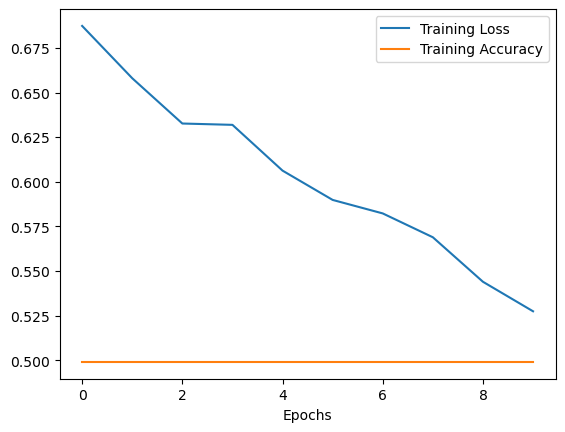

In [24]:
# Créer le modèle RNN basique
model_adjusted = Sequential()
model_adjusted.add(Embedding(input_dim=10000, output_dim=32, input_length=max_length))
model_adjusted.add(SimpleRNN(units=64))
model_adjusted.add(Dense(units=1, activation='softmax'))

model_adjusted.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
batch_size = 128
epochs = 10

history_adjusted = model_adjusted.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(history_adjusted.history['loss'], label='Training Loss')
plt.plot(history_adjusted.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

313/313 [==============================] - 5s 14ms/step
Précision du modèle : 58.83%


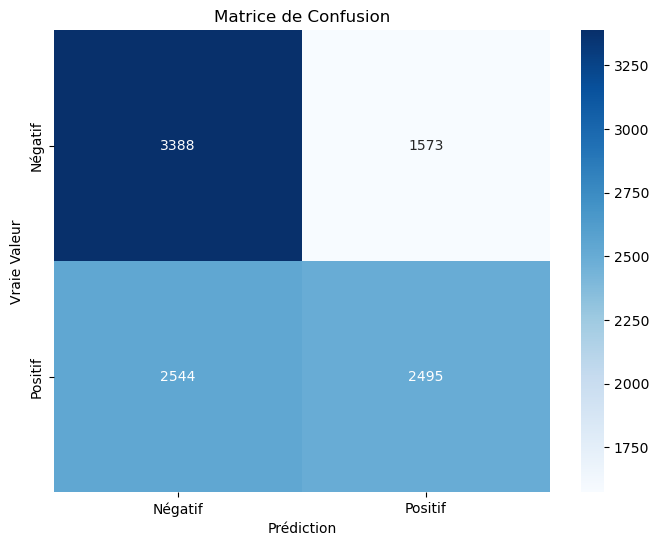

Rapport de Classification :
              precision    recall  f1-score   support

           0       0.57      0.68      0.62      4961
           1       0.61      0.50      0.55      5039

    accuracy                           0.59     10000
   macro avg       0.59      0.59      0.58     10000
weighted avg       0.59      0.59      0.58     10000



In [25]:
y_pred_adjusted = model_adjusted.predict(x_test)
y_pred_adjusted = (y_pred > 0.5).astype(int) 

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred_adjusted)
print(f"Précision du modèle : {accuracy * 100:.2f}%")

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Négatif', 'Positif'], yticklabels=['Négatif', 'Positif'])
plt.xlabel('Prédiction')
plt.ylabel('Vraie Valeur')
plt.title('Matrice de Confusion')
plt.show()

# Afficher le rapport de classification
print("Rapport de Classification :")
print(classification_report(y_test, y_pred_adjusted))

---
> **Modification du nombre d'unités dans le RNN** :

    Augmenter le nombre d'unités peut augmenter la capacité du modèle à apprendre des motifs complexes, mais cela peut également conduire à un surapprentissage, en particulier si la quantité de données d'entraînement est limitée. Il est souvent utile de rechercher le nombre optimal d'unités par validation croisée.
    
> **Utilisation d'une autre fonction d'activation pour la couche de sortie** :

    La fonction d'activation utilisée dans la couche de sortie détermine comment les résultats sont transformés en probabilités ou valeurs de sortie. Utiliser une fonction d'activation différente, comme "softmax" pour une classification multiclasses, peut affecter la manière dont le modèle attribue des probabilités aux différentes classes.
---

---
---
---

## Partie II : Implémenter un réseau RNN pour effectuer la tâche du Part Of Speech

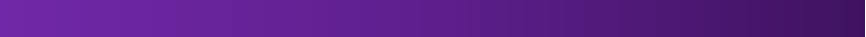

* **Étape 1: Préparation de l’environnement du travail**

In [48]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

* **Étape 2: Création d’un simple Jeu de Données**

In [49]:
sentences = [['I', 'feel', 'hungry'],
             ['tensorflow', 'is', 'very', 'difficult'],
             ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
             ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
       ['noun', 'verb', 'adverb', 'adjective'],
       ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
       ['noun', 'verb', 'adverb', 'adjective', 'verb']]

word_list = ['<pad>'] + sorted(set(sum(sentences, [])))
word2idx = {word: idx for idx, word in enumerate(word_list)}
idx2word = {idx: word for idx, word in enumerate(word_list)}

pos_list = sorted(set(sum(pos, [])))
pos2idx = {pos: idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx: pos for idx, pos in enumerate(pos_list)}


In [50]:
print(word_list)
print('/n--------------------------------------------')
print(pos_list)

['<pad>', 'I', 'a', 'changing', 'deep', 'difficult', 'fast', 'feel', 'for', 'framework', 'hungry', 'is', 'learning', 'tensorflow', 'very']
/n--------------------------------------------
['adjective', 'adverb', 'determiner', 'noun', 'preposition', 'pronoun', 'verb']


In [51]:
print(word2idx)
print('/n--------------------------------------------')
print(pos2idx)

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
/n--------------------------------------------
{'adjective': 0, 'adverb': 1, 'determiner': 2, 'noun': 3, 'preposition': 4, 'pronoun': 5, 'verb': 6}


In [52]:
print(idx2word)
print('/n--------------------------------------------')
print(idx2pos)

{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
/n--------------------------------------------
{0: 'adjective', 1: 'adverb', 2: 'determiner', 3: 'noun', 4: 'preposition', 5: 'pronoun', 6: 'verb'}


* **Étape 3:  Pre-processing**

In [53]:
X = [[word2idx[w] for w in s ] for s in sentences]
y = [[pos2idx[p] for p in po ] for po in pos]

In [54]:
X

[[1, 7, 10], [13, 11, 14, 5], [13, 11, 2, 9, 8, 4, 12], [13, 11, 14, 6, 3]]

In [55]:
y

[[5, 6, 0], [3, 6, 1, 0], [3, 6, 2, 3, 4, 0, 3], [3, 6, 1, 0, 6]]

In [56]:
len(word2idx)

15

In [57]:
len(pos2idx)

7

In [58]:
X = pad_sequences(X, maxlen=10, padding='post')
y = pad_sequences(y, maxlen=7, padding='post')

In [59]:
y

array([[5, 6, 0, 0, 0, 0, 0],
       [3, 6, 1, 0, 0, 0, 0],
       [3, 6, 2, 3, 4, 0, 3],
       [3, 6, 1, 0, 6, 0, 0]])

In [60]:
y[1]

array([3, 6, 1, 0, 0, 0, 0])

* **Étape 4: Construction du Modèle RNN basique**

In [61]:
model_pos = Sequential()
model_pos.add(Embedding(15, 32, input_length=10))
model_pos.add(SimpleRNN(10))
model_pos.add(Dense(7,activation="relu"))
model_pos.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 32)            480       
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 10)                430       
                                                                 
 dense_3 (Dense)             (None, 7)                 77        
                                                                 
Total params: 987 (3.86 KB)
Trainable params: 987 (3.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Etape 5: Compilation et Entraînement du Modèle**

In [63]:
model_pos.compile(optimizer="adam",loss="mse",metrics=["accuracy"])

In [65]:
X, y = np.array(X, dtype=np.uint8), np.array(y, dtype=np.uint8)

In [66]:
X

array([[ 1,  7, 10,  0,  0,  0,  0,  0,  0,  0],
       [13, 11, 14,  5,  0,  0,  0,  0,  0,  0],
       [13, 11,  2,  9,  8,  4, 12,  0,  0,  0],
       [13, 11, 14,  6,  3,  0,  0,  0,  0,  0]], dtype=uint8)

In [67]:
y

array([[5, 6, 0, 0, 0, 0, 0],
       [3, 6, 1, 0, 0, 0, 0],
       [3, 6, 2, 3, 4, 0, 3],
       [3, 6, 1, 0, 6, 0, 0]], dtype=uint8)

Epoch 1/10
1/1 [==============================] - 0s 22ms/step - loss: 9.1346 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 20ms/step - loss: 9.0828 - accuracy: 0.2500
Epoch 3/10
1/1 [==============================] - 0s 21ms/step - loss: 9.0272 - accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 21ms/step - loss: 8.9663 - accuracy: 0.2500
Epoch 5/10
1/1 [==============================] - 0s 18ms/step - loss: 8.9021 - accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 21ms/step - loss: 8.8333 - accuracy: 0.2500
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 8.7606 - accuracy: 0.2500
Epoch 8/10
1/1 [==============================] - 0s 22ms/step - loss: 8.6848 - accuracy: 0.2500
Epoch 9/10
1/1 [==============================] - 0s 23ms/step - loss: 8.6068 - accuracy: 0.2500
Epoch 10/10
1/1 [==============================] - 0s 23ms/step - loss: 8.5247 - accuracy: 0.2500


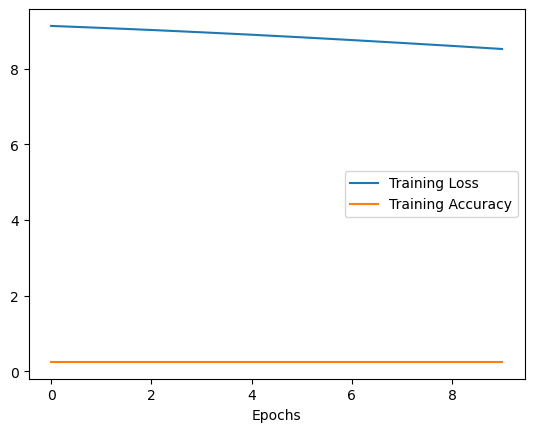

In [69]:
hist_pos= model_pos.fit(X,y, epochs=10)

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(hist_pos.history['loss'], label='Training Loss')
plt.plot(hist_pos.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

* **Etape 6:Évaluation du Modèle**

In [79]:
y_pred = model_pos.predict(X)
y_pred = (y_pred > 0.5).astype(int) 
y_pred

1/1 [==============================] - 0s 39ms/step


array([[0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0]])

In [80]:
y

array([[5, 6, 0, 0, 0, 0, 0],
       [3, 6, 1, 0, 0, 0, 0],
       [3, 6, 2, 3, 4, 0, 3],
       [3, 6, 1, 0, 6, 0, 0]], dtype=uint8)

* **Etape 7: Analyse des Paramètres du Modèle**

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 9.6481 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 24ms/step - loss: 9.5536 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 23ms/step - loss: 9.4604 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 22ms/step - loss: 9.3689 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 22ms/step - loss: 9.2794 - accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 22ms/step - loss: 9.1923 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 24ms/step - loss: 9.1076 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 25ms/step - loss: 9.0257 - accuracy: 0.5000
Epoch 9/10
1/1 [==============================] - 0s 24ms/step - loss: 8.9466 - accuracy: 0.5000
Epoch 10/10
1/1 [==============================] - 0s 25ms/step - loss: 8.8703 - accuracy: 0.5000


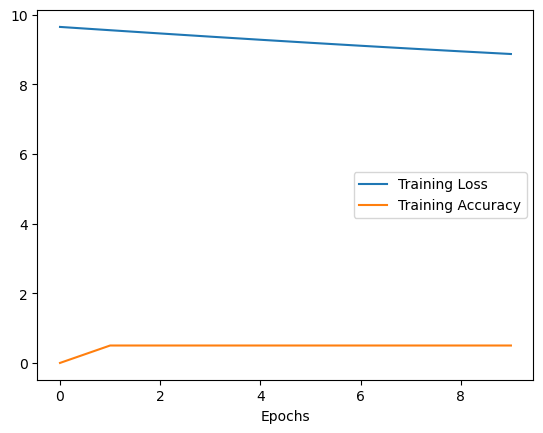

In [81]:
model_pos_tanh = Sequential()
model_pos_tanh.add(Embedding(15, 32, input_length=10))
model_pos_tanh.add(SimpleRNN(10))
model_pos_tanh.add(Dense(7,activation="tanh"))
model_pos_tanh.compile(optimizer="adam",loss="mse",metrics=["accuracy"])
hist_pos_tanh= model_pos_tanh.fit(X,y, epochs=10)

# Afficher la courbe d'apprentissage (training loss et accuracy)
plt.plot(hist_pos_tanh.history['loss'], label='Training Loss')
plt.plot(hist_pos_tanh.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [82]:
y_pred = model_pos_tanh.predict(X)
y_pred = (y_pred > 0.5).astype(int) 
y_pred

1/1 [==============================] - 0s 281ms/step


array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [83]:
y

array([[5, 6, 0, 0, 0, 0, 0],
       [3, 6, 1, 0, 0, 0, 0],
       [3, 6, 2, 3, 4, 0, 3],
       [3, 6, 1, 0, 6, 0, 0]], dtype=uint8)